Importing pandas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Loading the clean Student Performance DataFile

In [2]:
df=pd.read_csv('cleaned_data.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'gender', 'race/ethnicity',
       'parental level of education', 'lunch', 'test preparation course',
       'math score', 'reading score', 'writing score', 'gender_map',
       'race/ethinicity_map', 'parental_level_of_education_map', 'lunch_map',
       'test_preparation_course_map', 'Result', 'math_performance',
       'reading_performance', 'writing_performance', 'total', 'percentage',
       'grades', 'Result_map', 'grades_map'],
      dtype='object')

# Predicting Gender

In [4]:
x = df[['math score','reading score','writing score','gender_map','race/ethinicity_map','parental_level_of_education_map','test_preparation_course_map','lunch_map','Result_map', 'grades_map']]

# Identifying and handling Outliers with Z-score

In [5]:
# With Z-Score
from scipy import stats
z = np.abs(stats.zscore(x))
print(z)

[[0.39002351 0.19399858 0.39149181 ... 0.74188112 0.23182058 0.26095126]
 [0.19207553 1.42747598 1.31326868 ... 0.74188112 0.23182058 1.23103031]
 [1.57771141 1.77010859 1.64247471 ... 0.74188112 0.23182058 1.23103031]
 ...
 [0.46775108 0.12547206 0.20107904 ... 1.34792485 0.23182058 0.26095126]
 [0.12609287 0.60515772 0.58901542 ... 0.74188112 0.23182058 0.26095126]
 [0.71993682 1.15336989 1.18158627 ... 1.34792485 0.23182058 1.23103031]]


In [6]:
print(np.where(z > 3))

(array([  7,   9,  17,  17,  33,  55,  59,  59,  59,  59,  61,  66,  69,
        75,  76,  76,  84,  91, 131, 145, 211, 217, 284, 327, 327, 327,
       331, 338, 339, 363, 383, 384, 424, 455, 466, 527, 528, 555, 596,
       596, 596, 601, 616, 620, 683, 706, 729, 741, 777, 785, 787, 787,
       810, 840, 842, 862, 895, 896, 902, 921, 980, 980, 980]), array([8, 8, 0, 8, 8, 8, 0, 1, 2, 8, 8, 8, 8, 8, 2, 8, 8, 8, 8, 8, 8, 8,
       8, 1, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 2, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 1, 8]))


In [7]:
df_outliers = x[(z < 3).all(axis=1)]


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

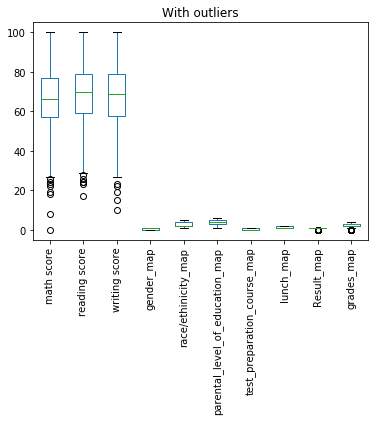

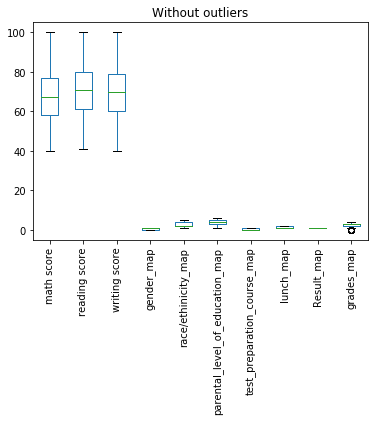

In [8]:
plt.figure(1)
x.plot.box()
plt.title("With outliers")
plt.xticks(rotation=90)
plt.figure(1)
df_outliers.plot.box()
plt.title("Without outliers")
plt.xticks(rotation=90)

# Training and testing after handling outliers

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
df_outliers_cleared = df_outliers[['math score','reading score','writing score','grades_map','race/ethinicity_map','parental_level_of_education_map','test_preparation_course_map','lunch_map','Result_map']]
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(df_outliers_cleared)
y = df_outliers['gender_map']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)

# Using Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
clf.fit(df_outliers_cleared, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [12]:
clf.score(X_train,y_train)

0.5045180722891566

In [13]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# checking the important features

In [14]:
feature=['grades_map',
       'race/ethinicity_map', 'parental_level_of_education_map', 'lunch_map',
       'test_preparation_course_map','math score','reading score','writing score','Result_map' ]

In [15]:
feature_imp=pd.DataFrame({'feature':feature,'importance':clf.feature_importances_})
feature_imp

,feature,importance
0,grades_map,0.215045
1,race/ethinicity_map,0.284106
2,parental_level_of_education_map,0.406345
3,lunch_map,0.043976
4,test_preparation_course_map,0.029087
5,math score,0.010666
6,reading score,0.007474
7,writing score,0.003302
8,Result_map,0.000000


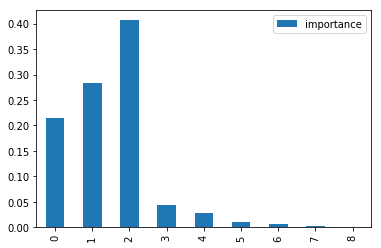

In [16]:
feature_imp.plot.bar()

# Removing less imp features from the feature

In [17]:
df_new = df_outliers_cleared.drop(['reading score','math score','writing score','Result_map'], axis=1)

# Training and Testing after removing less imp features

In [18]:
robust_scaler2 = RobustScaler()
X = robust_scaler2.fit_transform(df_new)
y = df_outliers['gender_map']
X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.2,random_state=100)

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(n_jobs=-1, random_state=10)

In [20]:
logistic_regression.fit(X_train2,y_train2)

/home/subash/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/subash/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=10, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
prediction = logistic_regression.predict(X_test2)

In [22]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix,accuracy_score, f1_score

In [23]:
print ('Accuracy:', accuracy_score(y_test2,prediction ))
print ('F1 score:', f1_score(y_test2, prediction,average='micro'))
print ('Precision:', precision_score(y_test2, prediction,average='micro'))
print ('Recall:', recall_score(y_test2, prediction,average='micro'))
print ('\n confussion matrix:\n',confusion_matrix(y_test2, prediction))

Accuracy: 0.5578947368421052
F1 score: 0.5578947368421052
Precision: 0.5578947368421052
Recall: 0.5578947368421052

 confussion matrix:
 [[41 60]
 [24 65]]


# Classification Trees

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=10,random_state=10)
clf.fit(X_train2,y_train2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [25]:
prediction = clf.predict(X_test2)

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [27]:
print ('Accuracy:', accuracy_score(y_test2,prediction ))

Accuracy: 0.5368421052631579


In [28]:
print ('\n confussion matrix:\n',confusion_matrix(y_test2, prediction))


 confussion matrix:
 [[50 51]
 [37 52]]


# Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()

In [31]:
model.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
model.score(X_train2,y_train2)

0.030486794151430293

In [33]:
model.score(X_test2,y_test2)

0.009527095295377208

In [34]:
prediction=model.predict(X_test2)
prediction

array([0.53388926, 0.54877938, 0.44701536, 0.58501585, 0.56769889,
       0.45709146, 0.54791543, 0.48415544, 0.49818161, 0.56810331,
       0.45618785, 0.58545992, 0.45997783, 0.55991917, 0.474004  ,
       0.60763056, 0.45997783, 0.63140376, 0.56370916, 0.51640218,
       0.50682528, 0.52853639, 0.56477285, 0.5883463 , 0.65164675,
       0.55263864, 0.41752454, 0.62256034, 0.67385705, 0.63226771,
       0.56567646, 0.49904556, 0.57295699, 0.62026397, 0.64386703,
       0.43776753, 0.35336014, 0.57727579, 0.44990174, 0.6201335 ,
       0.56810331, 0.50439844, 0.50349482, 0.56856284, 0.43397754,
       0.61541028, 0.53146242, 0.51882902, 0.5236827 , 0.57773532,
       0.47211204, 0.49904556, 0.39490982, 0.5236827 , 0.60433977,
       0.46437198, 0.6327669 , 0.53146242, 0.4315507 , 0.5628452 ,
       0.54635254, 0.62655007, 0.43776753, 0.41267086, 0.62412323,
       0.43933042, 0.56082278, 0.59031361, 0.4595183 , 0.59948609,
       0.51653264, 0.566136  , 0.38042412, 0.59705925, 0.53388

Text(0, 0.5, 'Predictions')

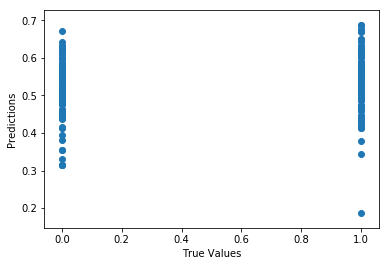

In [35]:
plt.scatter(y_test2, prediction)
plt.xlabel("True Values")
plt.ylabel("Predictions")

# KNN

In [36]:
# Training data
x3 = df[['grades_map',
       'race/ethinicity_map', 'parental_level_of_education_map',
       'test_preparation_course_map','reading score','writing score']]
# target values 
y3 = df['gender_map']

X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.20, random_state=40)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train3, y_train3) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [38]:
neigh.score(X_test3,y_test3)

0.56

In [39]:
predict = neigh.predict(X_test3)
predict

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0])

In [40]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test3, predict)
accuracy

0.56

In [41]:
from sklearn import metrics
print(metrics.classification_report(y_test3,predict))

              precision    recall  f1-score   support

           0       0.57      0.51      0.54       100
           1       0.55      0.61      0.58       100

   micro avg       0.56      0.56      0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.56      0.56      0.56       200

